# Introduction

# Data Import

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
Cirrhosis_DS0 = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Cirrhosis/data/cir_mortality.csv')

In [3]:
# check metadata
Cirrhosis_DS0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86432 entries, 0 to 86431
Data columns (total 64 columns):
VISIT_ID2                          86432 non-null int64
MORTALITY                          86432 non-null int64
AKI_CATEGORY2                      86432 non-null object
ARDS                               86432 non-null object
ABX                                86432 non-null int64
BETA_BLOCKER                       86432 non-null int64
CRYST_RES_VOL_CATEGORY             86432 non-null object
DIURETIC                           86432 non-null int64
GIDX_BLEEDING                      86432 non-null int64
GLYCEMIA                           86432 non-null object
HE                                 86432 non-null int64
HRS                                86432 non-null int64
LVP                                86432 non-null int64
RRT                                86432 non-null int64
SBP                                86432 non-null int64
SEPSIS                             86432 non-nu

In [4]:
# set index
Cirrhosis_DS0.set_index(['VISIT_ID2'], inplace = True)

# Data Cleaning

## Delete Missing Values

In [5]:
# check missing values
missing_data = Cirrhosis_DS0.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['missing %'] = missing_data['missing values'] / Cirrhosis_DS0.shape[0] * 100
missing_data.sort_values('missing %').reset_index(drop = True)

,variable,missing values,missing %
0,MORTALITY,0,0.000000
1,ALCOHOLIC_CIRRHOSIS,0,0.000000
2,VISIT_PER_YEAR_GROUP,0,0.000000
3,URBAN,0,0.000000
4,TEACHING_FACILITY,0,0.000000
5,RACE_GROUP,0,0.000000
6,PAYER_GROUP,0,0.000000
7,INDEX_YEAR,0,0.000000
8,FEMALE,0,0.000000
9,CENSUS_REGION,0,0.000000


In [6]:
# delete missing values
Cirrhosis_DS1 = Cirrhosis_DS0.dropna()
Cirrhosis_DS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83179 entries, 326305398 to 283396498
Data columns (total 63 columns):
MORTALITY                          83179 non-null int64
AKI_CATEGORY2                      83179 non-null object
ARDS                               83179 non-null object
ABX                                83179 non-null int64
BETA_BLOCKER                       83179 non-null int64
CRYST_RES_VOL_CATEGORY             83179 non-null object
DIURETIC                           83179 non-null int64
GIDX_BLEEDING                      83179 non-null int64
GLYCEMIA                           83179 non-null object
HE                                 83179 non-null int64
HRS                                83179 non-null int64
LVP                                83179 non-null int64
RRT                                83179 non-null int64
SBP                                83179 non-null int64
SEPSIS                             83179 non-null int64
STEROIDS                           

## Encode Categorical Features

In [7]:
# encode categorical features
Cirrhosis_DS2 = pd.get_dummies(Cirrhosis_DS1)
Cirrhosis_DS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83179 entries, 326305398 to 283396498
Columns: 104 entries, MORTALITY to VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_Q4
dtypes: float64(31), int64(19), uint8(54)
memory usage: 36.6 MB


In [9]:
# drop one level to avoid collinearity
variables_to_drop = ['AKI_CATEGORY2_NONE', 'ARDS_NONE', 'CRYST_RES_VOL_CATEGORY_>1250', 
                     'GLYCEMIA_NEITHER', 'TIME_TO_ALB_CATEGORY_LOS_NONE', 'ADMISSION_TYPE_GROUP_Emergency', 
                     'AGE_GROUP_18-29', 'BED_SIZE_0-99', 'CENSUS_REGION_South', 
                     'PAYER_GROUP_Commercial', 'RACE_GROUP_Caucasian', 'TEACHING_FACILITY_No', 
                     'VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_Q4']
Cirrhosis_DS3 = Cirrhosis_DS2.drop(variables_to_drop, axis = 1)
Cirrhosis_DS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83179 entries, 326305398 to 283396498
Data columns (total 91 columns):
MORTALITY                                 83179 non-null int64
ABX                                       83179 non-null int64
BETA_BLOCKER                              83179 non-null int64
DIURETIC                                  83179 non-null int64
GIDX_BLEEDING                             83179 non-null int64
HE                                        83179 non-null int64
HRS                                       83179 non-null int64
LVP                                       83179 non-null int64
RRT                                       83179 non-null int64
SBP                                       83179 non-null int64
SEPSIS                                    83179 non-null int64
STEROIDS                                  83179 non-null int64
VENTILATION                               83179 non-null int64
VASOPRESSOR                               83179 non-null int

In [10]:
# check table
Cirrhosis_DS3.head()

,MORTALITY,ABX,BETA_BLOCKER,DIURETIC,GIDX_BLEEDING,HE,HRS,LVP,RRT,SBP,...,RACE_GROUP_African American,RACE_GROUP_Asian/Pacific Islander,RACE_GROUP_Hispanic,RACE_GROUP_Not Specified,RACE_GROUP_Other,TEACHING_FACILITY_Not Specified,TEACHING_FACILITY_Yes,VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_Q1,VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_Q2,VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_Q3
VISIT_ID2,,,,,,,,,,,,,,,,,,,,,
326305398,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
326305419,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
340607531,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
340607536,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
269544789,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


# Data Preparation

## Seperate Features and Targets

In [11]:
# create the target vector
y = Cirrhosis_DS3.iloc[:, Cirrhosis_DS3.columns == 'MORTALITY']
y['MORTALITY'].value_counts()

0    74275
1     8904
Name: MORTALITY, dtype: int64

In [12]:
# create the features matrix
X = Cirrhosis_DS3.iloc[:, Cirrhosis_DS3.columns != 'MORTALITY']
X.describe()

,ABX,BETA_BLOCKER,DIURETIC,GIDX_BLEEDING,HE,HRS,LVP,RRT,SBP,SEPSIS,...,RACE_GROUP_African American,RACE_GROUP_Asian/Pacific Islander,RACE_GROUP_Hispanic,RACE_GROUP_Not Specified,RACE_GROUP_Other,TEACHING_FACILITY_Not Specified,TEACHING_FACILITY_Yes,VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_Q1,VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_Q2,VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_Q3
count,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,...,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000,83179.000000
mean,0.616382,0.164092,0.440436,0.144964,0.192188,0.045576,0.264526,0.057683,0.035838,0.110785,...,0.138665,0.014306,0.013549,0.015304,0.071388,0.170812,0.675435,0.266089,0.244665,0.249907
std,0.486270,0.370361,0.496442,0.352067,0.394022,0.208566,0.441083,0.233144,0.185888,0.313868,...,0.345598,0.118752,0.115610,0.122761,0.257474,0.376347,0.468215,0.441914,0.429891,0.432961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split Data into Training and Test Sets

In [13]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345)
print('Training Features Shape:', X_train.shape)
print('Training Lable Shape:', y_train.shape)
print('Test Features Shape:', X_test.shape)
print('Test Lable Shape:', y_test.shape)

Training Features Shape: (58225, 90)
Training Lable Shape: (58225, 1)
Test Features Shape: (24954, 90)
Test Lable Shape: (24954, 1)


In [14]:
# fit standardizer to training set
standardizer = StandardScaler()
standardizer.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
# apply to both training and test sets
X_trian_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

In [16]:
# covert labels to arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Logistic Regression

## Train Model

In [17]:
# create a base Logistic model
base_logit = LogisticRegression(class_weight = 'balanced', random_state = 12345)

In [18]:
# train the model on training data
base_logit.fit(X_trian_std , y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2',
          random_state=12345, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)

## Predict Test Data

In [19]:
# predict test data
y_pred_logit = base_logit.predict(X_test_std)
y_pred_prob_logit = base_logit.predict_proba(X_test_std)

## Evaulate Performance

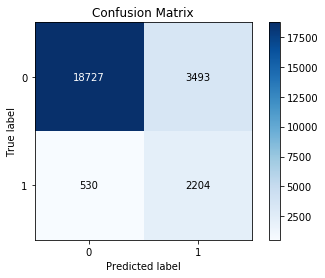

In [20]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logit)
plt.show()

In [21]:
# extract true_positives, false_positives, true_negatives, false_negatives
cm_matrix = confusion_matrix(y_test, y_pred_logit)
tn, fp, fn, tp = cm_matrix.ravel()
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  18727
False Positives:  3493
False Negatives:  530
True Positives:  2204


In [22]:
# accuracy
accuracy = (tn+tp)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}:".format(accuracy))

Accuracy 0.84:


In [23]:
# precision
precision = tp/(tp+fp)
print("Precision {:0.2f}:".format(precision))

Precision 0.39:


In [24]:
# recall
recall = tp /(tp+fn)
print("# Recall {:0.2f}:".format(recall))

# Recall 0.81:


In [25]:
# f1 score
f1 = (2*precision*recall)/(precision+recall)
print("# F1 Score {:0.2f}:".format(f1))

# F1 Score 0.52:


In [26]:
# print classification report
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     22220
           1       0.39      0.81      0.52      2734

   micro avg       0.84      0.84      0.84     24954
   macro avg       0.68      0.82      0.71     24954
weighted avg       0.91      0.84      0.86     24954



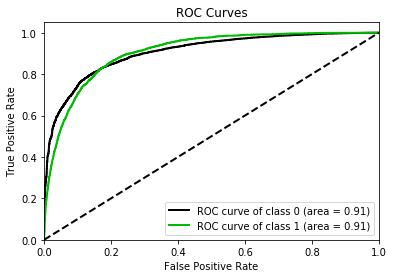

In [27]:
# plot ROC curves
skplt.metrics.plot_roc_curve(y_test, y_pred_prob_logit, curves = ('each_class'))
plt.show()

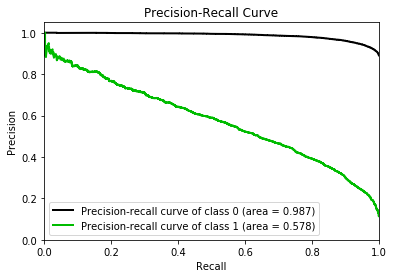

In [28]:
# plot Precision-Recall curve
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_logit, curves = ('each_class'))
plt.show()

# Random Forests

## Train Model

In [29]:
# create a base Random Forest model
base_rf = RandomForestClassifier(n_estimators = 1000, class_weight = 'balanced', random_state = 12345)

In [31]:
# train the model on training data
base_rf.fit(X_trian_std , y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=12345, verbose=0, warm_start=False)

## Predict Test Data

In [32]:
# predict test data
y_pred_rf = base_rf.predict(X_test_std)
y_pred_prob_rf = base_rf.predict_proba(X_test_std)

## Evaulate Performance

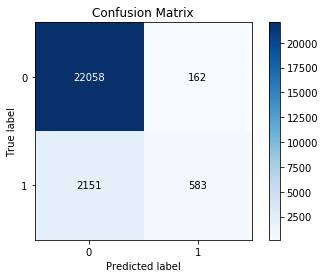

In [33]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf)
plt.show()

In [34]:
# extract true_positives, false_positives, true_negatives, false_negatives
cm_matrix = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_matrix.ravel()
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  22058
False Positives:  162
False Negatives:  2151
True Positives:  583


In [35]:
# accuracy
accuracy = (tn+tp)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}:".format(accuracy))

Accuracy 0.91:


In [36]:
# precision
precision = tp/(tp+fp)
print("Precision {:0.2f}:".format(precision))

Precision 0.78:


In [37]:
# recall
recall = tp /(tp+fn)
print("# Recall {:0.2f}:".format(recall))

# Recall 0.21:


In [38]:
# f1 score
f1 = (2*precision*recall)/(precision+recall)
print("# F1 Score {:0.2f}:".format(f1))

# F1 Score 0.34:


In [39]:
# print classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     22220
           1       0.78      0.21      0.34      2734

   micro avg       0.91      0.91      0.91     24954
   macro avg       0.85      0.60      0.64     24954
weighted avg       0.90      0.91      0.88     24954



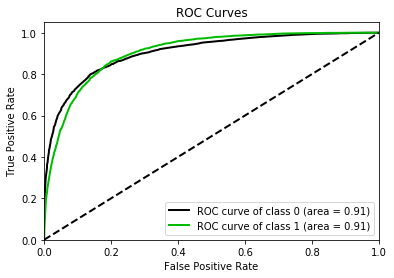

In [40]:
# plot ROC curves
skplt.metrics.plot_roc_curve(y_test, y_pred_prob_rf, curves = ('each_class'))
plt.show()

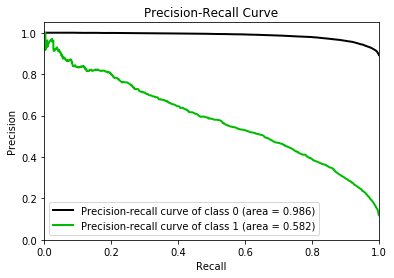

In [41]:
# plot Precision-Recall curve
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_rf, curves = ('each_class'))
plt.show()

## Examine Variable Importances

In [42]:
# create a dataframe of feature importances
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = base_rf.feature_importances_
feature_importances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
feature       90 non-null object
importance    90 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [43]:
# sort dataframe by feature importances
feature_importances_srt = feature_importances.sort_values(by='importance', ascending = False).reset_index()
feature_importances_srt

,index,feature,importance
0,17,MELD_Na,0.097317
1,12,VASOPRESSOR,0.074025
2,9,SEPSIS,0.069124
3,11,VENTILATION,0.068264
4,16,ELIXHAUSER_INDEX,0.050279
5,49,AKI_CATEGORY2_MILD,0.036698
6,50,AKI_CATEGORY2_SEVERE,0.031124
7,14,INDEX_YEAR,0.026306
8,53,ARDS_SEVERE ARDS,0.022517
9,61,TIME_TO_ALB_CATEGORY_LOS_>24,0.019518


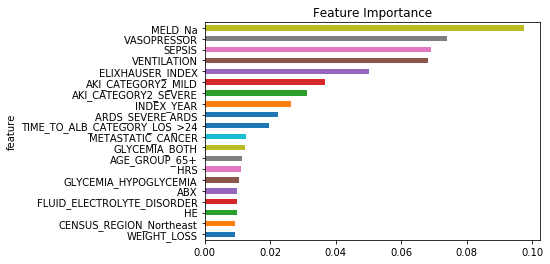

In [44]:
# plot Top 20 feature importances
feature_importances_top20 = feature_importances_srt.iloc[0:20, :]
feature_importances_top20.sort_values(by='importance', ascending = True, inplace = True)
feature_importances_top20.plot(x = 'feature', y = 'importance', kind = 'barh', legend = False)
plt.title('Feature Importance')
plt.show()

# Conclusion